<a href="https://colab.research.google.com/github/headnotf0und/refactored-octo-rotary-phone/blob/main/Projekt_Janek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pymcdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 2.7 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pymcdm as pm
from pymcdm.helpers import rrankdata

This Section demonstrates how to apply our pymcdm library in a simple case. It will be demonstrated on an artificial decision matrix with 3 criteria and 4 alternatives.

Definition of a decision matrix. Usually, you will want to read one from the file.



In [5]:
matrix = np.array([
    [205, 30000, 6, 48, 250],
    [285, 39000, 8, 26, 265],
    [180, 36000, 4, 29, 210],
    [235, 35000, 4, 25, 185],
    [315, 37000, 3, 56, 335]
])

weights = np.ones(5) / 5 # Musi się sumować do jedynki

types = np.array([1, -1, -1, -1, 1]) # 1 jako zysk (max), -1 jako koszt (min)

Define the vector of weights. The Sum of the weights should be equal 1.

Define criteria types. The first and third are benefits, so we have 1 in types vector, and the second one is a cost, so we have -1 in this vector.

In the pymcdm library, every MCDA method is a class, so we first need to crate the object of out method. Some methods allow a certain degree of customization, e.g., the TOPSIS method allows to change normalization method in the constructor. Default normalization is a min-max normalization.

In [6]:
methods = {
    'TOPSIS (minmax)': pm.methods.TOPSIS(),
    'TOPSIS (vector)': pm.methods.TOPSIS(pm.normalizations.vector_normalization),
    'VIKOR': pm.methods.VIKOR(),
    'COPRAS': pm.methods.COPRAS(),
    'MABAC': pm.methods.MABAC()
}

preferences = {}
rankings = {}
for name, method_function in methods.items():
    preferences[name] = method_function(matrix, weights, types)
    rankings[name] = method_function.rank(preferences[name])

In [8]:
#print(np.round(pref / np.max(pref) * 100, 2))

NameError: name 'pref' is not defined

So we have calculated the preferences of the given four alternatives. The last one has a preference equal to 1, so this one is the best alternative. For the TOPSIS method, the most significant value of the preference means a better alternative. For other methods, you should check our documentation or methods described.

he last thing we want to do here is building of the ranking. We will use rranking method from the helpers module of the pymcdm library to rank those alternatives from the most significant preference value to the lowest preference value.

In [9]:
#rank = rrankdata(pref)
#print(rank)

NameError: name 'pref' is not defined

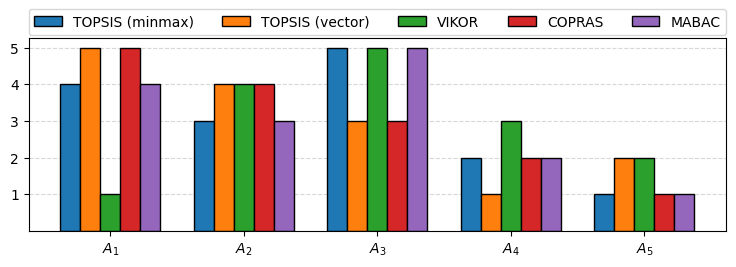

In [10]:
fig, ax = plt.subplots(figsize=(9, 2.5))

pm.visuals.ranking_bar(list(rankings.values()),
                       labels=list(rankings.keys()))

plt.show()

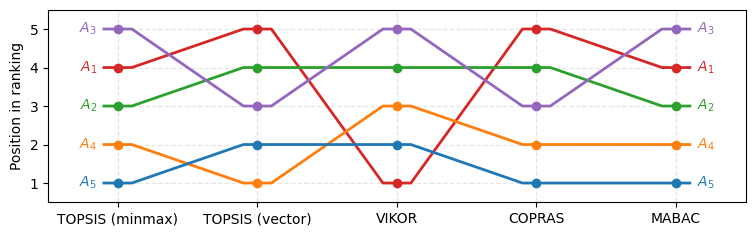

In [11]:
fig, ax = plt.subplots(figsize=(9, 2.5))

pm.visuals.ranking_flows(list(rankings.values()),
                         labels=list(rankings.keys()),
                         better_grid=True)

plt.show()

In [12]:
corr_matrix = pm.helpers.correlation_matrix(np.array(list(rankings.values())), pm.correlations.rw)
print(corr_matrix)

[[ 1.          0.65        0.3         0.8         1.        ]
 [ 0.65        1.         -0.2         0.85        0.65      ]
 [ 0.3        -0.2         1.         -0.06666667  0.3       ]
 [ 0.8         0.85       -0.06666667  1.          0.8       ]
 [ 1.          0.65        0.3         0.8         1.        ]]


[]

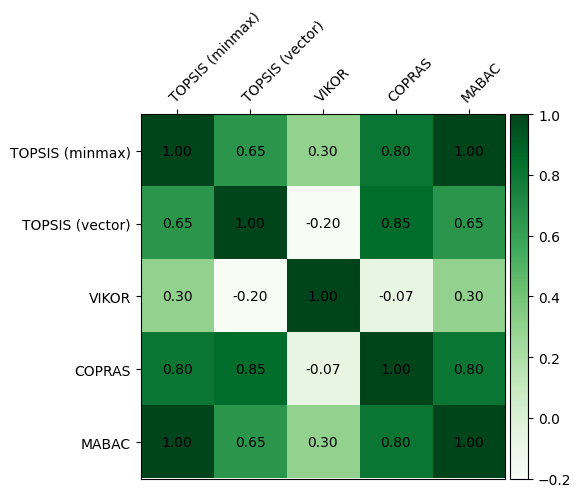

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))

pm.visuals.correlation_heatmap(corr_matrix,
                               labels=list(rankings.keys()),
                               labeltop=True,
                               colorbar=True)

plt.plot()

In [14]:
pm.correlations.rw([1, 2, 3, 4], [4, 3, 2, 1])

-1.0

In [15]:
pm.correlations.rw([1, 2, 3, 4], [1, 2, 3, 4])

1.0

In [16]:
w = np.array([4, 2, 4, 5], dtype='float')
w = w / w.sum()
print(w)

[0.26666667 0.13333333 0.26666667 0.33333333]
